In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Model of Wright and Malécot

set the model parameters

In [3]:
random_seed = 42
num_generations = 7
lambda_var = 0.1
side_length = 20
mutation_rate = 0.1
sigma = 1
l = sigma / np.sqrt(2*mutation_rate)
area = side_length**2
np.random.seed(random_seed)

Initial dispersion of individuals

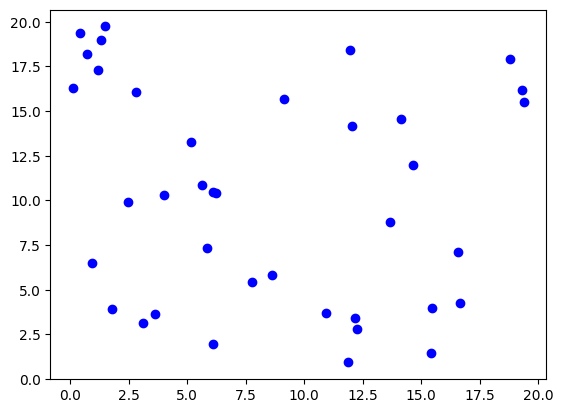

In [4]:
# number of first generations iniduviduals is poisson distributed
population_size = np.random.poisson(lam=lambda_var*area)
population = [[np.random.uniform(0, side_length), np.random.uniform(0, side_length), i, i] for i in range(population_size)]
plt.scatter([i[0] for i in population], [i[1] for i in population], c='b')
plt.show()

adding descendants per generation

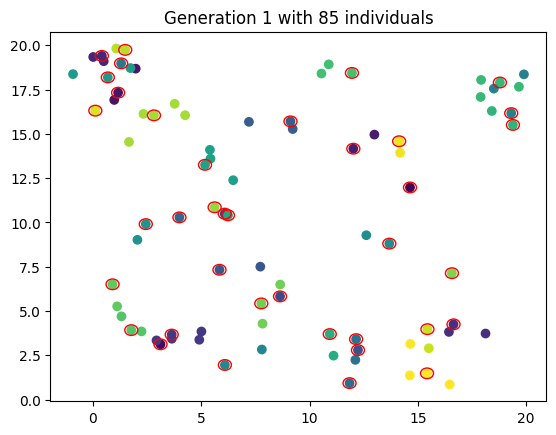

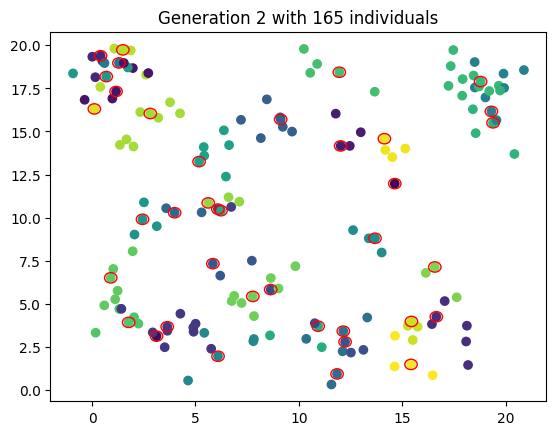

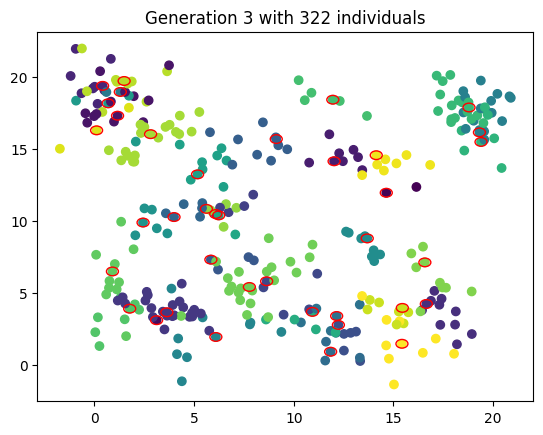

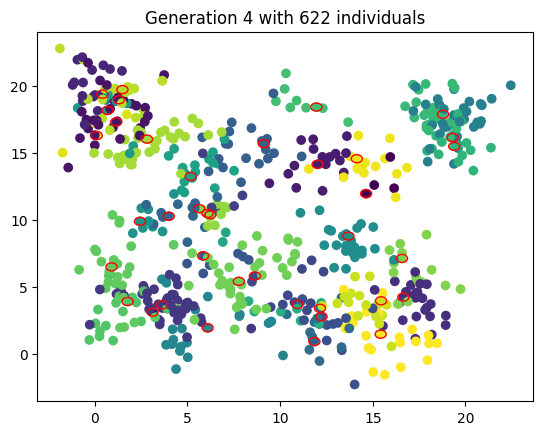

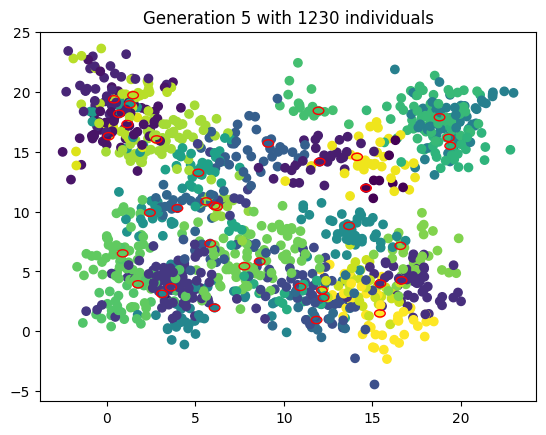

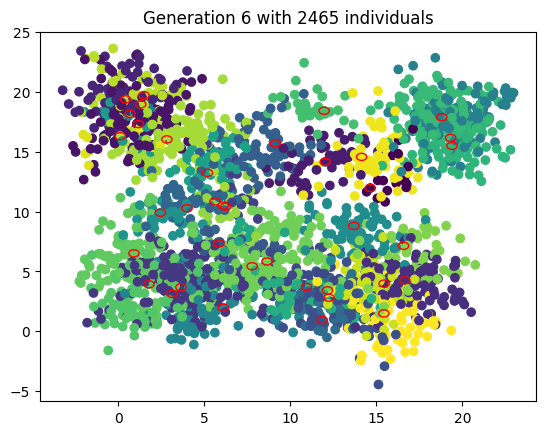

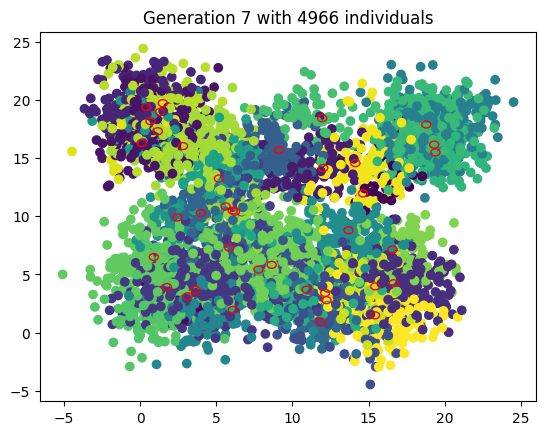

In [5]:
# keep track of number of individuals per generation, the number of alleles, and the number of individuals per allele
num_individuals = []
num_alleles = []
num_individuals_per_allele = []


for i in range(num_generations):
    new_population = population.copy()
    for parent in population:
        # the number of offspring of each parent is a possion random variable with mean 1
        num_offspring = np.random.poisson(1)
        parents_index = parent[3]
        for j in range(num_offspring):
            # the spatial location of the offspring is a normally distributed random variable with mean the parent and variance 1
            offspring_location = [np.random.normal(parent[0], sigma), np.random.normal(parent[1], sigma)]

            # the offspring has a mutation with probability mutation_rate
            if np.random.rand() < mutation_rate:
                allele = len(population)
                offspring = offspring_location + [allele] + [parents_index]
            else:
                # the offspring inherits the allele of the parent
                offspring = offspring_location + [parent[2]] + [parents_index]

            # the offspring is added to the population
            new_population.append(offspring)
    population = new_population
        
    # the number of individuals in the population
    num_individuals.append(len(population))
    # the number of alleles in the population
    num_alleles.append(len(set([i[2] for i in population])))
    # the number of individuals per allele
    num_individuals_per_allele.append([sum([1 for i in population if i[2] == j]) for j in range(num_alleles[-1])])

    plt.figure()
    plt.scatter([i[0] for i in population], [i[1] for i in population], c=[i[3] for i in population])
    plt.title('Generation ' + str(i+1) + ' with ' + str(num_individuals[-1]) + ' individuals')

    # circle the parent individuals in the final generation
    for i in range(population_size):
        plt.gca().add_artist(plt.Circle((population[i][0], population[i][1]), 0.3, color='r', fill=False))
    plt.show()

Plot of individuals in the final generation colored by parent index. Initial parents are marked with red dots

In [ ]:
# plot the individuals in the final generation and color them by parent index
plt.figure()
plt.scatter([i[0] for i in population], [i[1] for i in population], c=[i[3] for i in population])
plt.title('Individuals in final generation colored by parent index')

# circle the parent individuals in the final generation
for i in range(population_size):
    plt.gca().add_artist(plt.Circle((population[i][0], population[i][1]), 0.3, color='r', fill=False))
plt.show()

Just a check about the number of individuals in the population

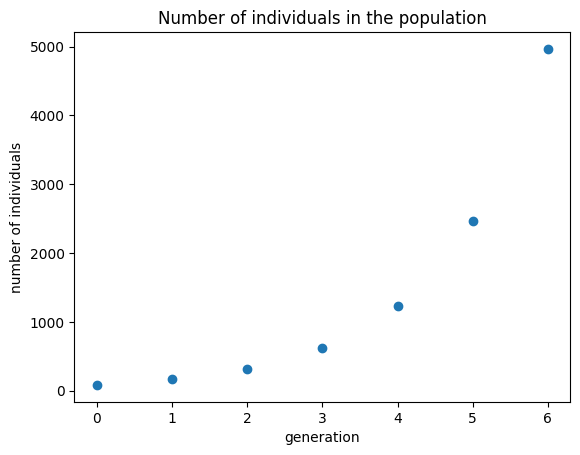

In [7]:
# plot the number of individuals in the population, the number of alleles in the population, and the number of individuals per allele
plt.figure()
plt.scatter(range(len(num_individuals)), num_individuals)
plt.xlabel('generation')
plt.ylabel('number of individuals')
plt.title('Number of individuals in the population')
plt.show()

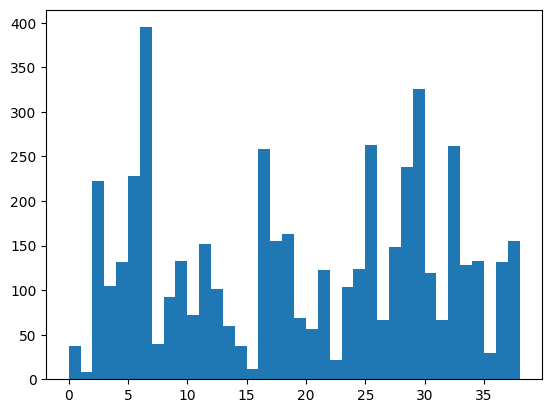

In [8]:
# plot the parent allele of each individual in the population
parent_alleles = [i[3] for i in population]
plt.hist(parent_alleles, bins=range(population_size+1))
plt.show()

Now evaluate each individual pairing to approximate the probability of descent for a given distance (Takes some time to run this cell)

In [ ]:
bucket_distance_length = 0.5

# number of buckets is the furthest distance divided by bucket distance length
no_buckets = int((2*side_length+sigma*num_generations)/bucket_distance_length) + 1
same_parent_bucket = [0 for i in range(no_buckets)]
diff_parent_bucket = [0 for i in range(no_buckets)]

for ind in population:
    # calculate the distance to every other individual
    distances = [np.sqrt((ind[0]-i[0])**2 + (ind[1]-i[1])**2) for i in population]
    # calculate if they have the same parent allele
    same_parent = [ind[3] == i[3] for i in population]
    # calculate the bucket index
    bucket_index = [int(i/bucket_distance_length) for i in distances]
    # add to the bucket
    for i in range(len(distances)):
        if same_parent[i]:
            same_parent_bucket[bucket_index[i]] += 1
        else:
            diff_parent_bucket[bucket_index[i]] += 1

In [ ]:
# for each bucket, divide the number of same parent bucket by the total number of individuals in the bucket
percentage = [0 for i in range(no_buckets)]
for j in range(no_buckets):
    if same_parent_bucket[j] + diff_parent_bucket[j] != 0:
        percentage[j] = same_parent_bucket[j]/(same_parent_bucket[j] + diff_parent_bucket[j])
    else:
        percentage[j] = 0

Plot the results against the Bessel function

In [ ]:
# plot the percentage of individuals with the same parent allele in each bucket and on a second axis the modified bessel function
plt.figure()
plt.scatter(range(no_buckets), percentage)
plt.xlabel('distance')
plt.ylabel('percentage of individuals with the same parent allele')
plt.title('Percentage of IBD individuals at distance x')

# plot the modified bessel function of the second kind of order 0
N = 0.3
k = 0.1
fraction = 1 / (N + np.log(l/k))

x = np.linspace(k, no_buckets, 100)
y = fraction * (np.exp(-(x/l)) * np.i0(x/l))
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.show()

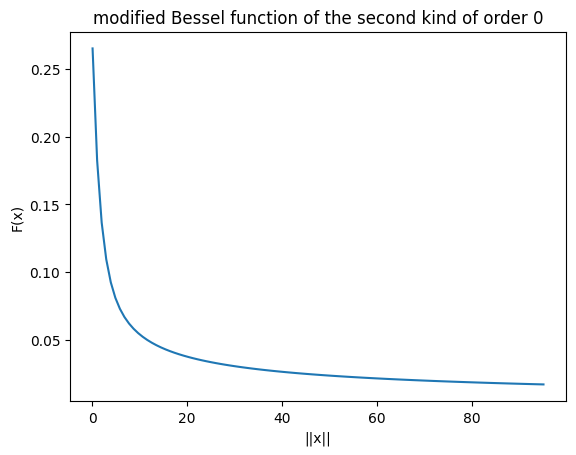

In [ ]:
# plot the percentage of individuals with the same parent allele in each bucket and on a second axis the modified bessel function
plt.figure()
plt.title('modified Bessel function of the second kind of order 0')

# plot the modified bessel function of the second kind of order 0
N = 0.5
k = 0.1
fraction = 1 / (N + np.log(l/k))

x = np.linspace(k, no_buckets, 100)
y = fraction * (np.exp(-(x/l)) * np.i0(x/l))
plt.plot(x, y)
plt.xlabel('||x||')
plt.ylabel('F(x)')
plt.show()